## Exploratory Data Analysis

- it is the process of cleaning and reviewing the data to derive insights such as descriptive statistics and correlations and generate hypothesis for experiments


In [ ]:
import pandas as pd
books = pd.read_csv("books.csv")

# .info() summarizes the total number of missing values in each column, the data type of each column and the memory usage
books.info()

# A CLOSER LOOK AT CATEGORICAL COLUMNS
books.value_counts("genre")

# A CLOSER LOOK AT NUMERICAL COLUMNS
# calling .describe on a dataframe computes, count, mean, std, min, 25th. 50th and 75th quantile and max of the columns
books.describe()

# VISUALIZING NUMERICAL DATA
import seaborn as sns
import matplotlib.pyplot as plt
sns.histplot(data = books, x = 'rating', binwidth = 0.1) 
plt.show()

                    

#### Data Validation

- We want to understand if the data types and ranges are as expected before we progress too far in our analysis

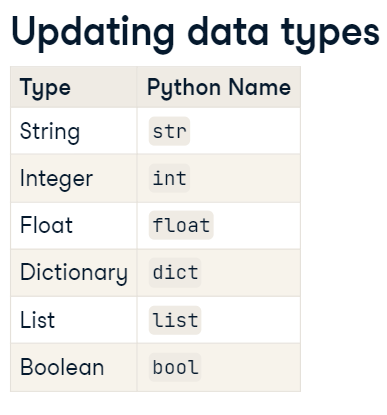

- Categorical data can be validated by comparing all the values of a column to a list of expected values in the column
- Numerical data can be easily analysed by viewing a detailed description of the data by using a boxplot

In [ ]:
# Return only the datatypes of a dataframe
books.dtypes

# UPDATING DATA TYPES
books['year'] = books['year'].astype(int)
books.dtypes

# VALIDATING CATEGORICAL DATA
# Categorical data can be validated by comparing all the values of a column to a list of expected values in the column
books['genre'].isin(['Fiction', 'Non Fiction'])
# This can be used in combination with subsetting to filter values
books[books['genre'].isin(['Fiction', 'Non Fiction'])].head()

# VALIDATING NUMERICAL DATA
# Numerical data can be selected an viewed using
books.select_dtypes("number")
# Range of years can be found using the .min() and the .max() function

### Data Summarization:

- .groupby() can be used to group data and use aggregating functions like mean, sum, count, min, max, var, std etc
- .agg() functions allows to apply aggregate multiple functions

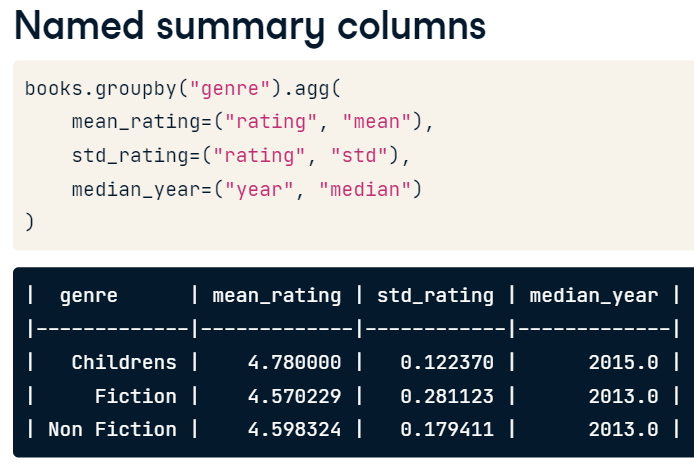

In [ ]:
# DATA SUMARIZATION

# Group by
books.groupby('genre').mean()
# Aggregating multiple functions using .agg function
books. agg(['mean', 'std'])
# Dictionaries are used to apply different aggregating fucntions to different columns
books.agg({"rating" : ["mean", "std"], "year": ["median"]})
# Named Summary columns
# Syntax: df.groupby('column').agg(new_col_name1 = ("col_name", "agg_function"), new_col_name2 = ("col_name", "agg_function"), new_col_name3 = ("col_name", "agg_function"))
books.groupby('genre').agg(mean_rating = ("rating", "mean"), std_rating = ("rating", "std"), median_year = ("year", "median"))

